# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [115]:
import pandas as pd
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #прочитаем csv файл и разделим данные по столбцам с помощью  sep = '\t'
#посмотрим первые 5 строк таблицы
print('------------------------------------')
print(real_estate_data.head(5)) 
print('Общая информация о таблице')
#просмотрим общей информации о таблице
real_estate_data.info() 


------------------------------------
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Пе

### Вывод

Таблица содержит 22 столбца и 23699 записей. В столбцах ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest,         days_exposition есть пропущенные занчения, которые нужно скорректировать. Целочисленные столбцы 'balcony','floors_total', 'days_exposition', 'parks_around3000', 'ponds_nearest' определены как числа с плавующей запятой (float64) и их требуется перевести в int64 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, данные загружены и общая информация о данных выведена.
</div>

### Шаг 2. Предобработка данных

In [116]:
#Посмотрим уникальные значения в столбцах и количество NaN в них.

print('Количество уникальных значений по столбцам таблицы:\n')
print('Балконы:\n', real_estate_data['balcony'].sort_values(ascending = False).value_counts(),'\n')

print('Высота потолков, м:\n',real_estate_data['ceiling_height'].sort_values().value_counts(),'\n')
print('Кол-во значений NaN в Высота потолков, м:',real_estate_data['ceiling_height'].isna().sum(),'\n')

print('Кол-во этажей в доме:\n',real_estate_data['floors_total'].value_counts().sort_values(),'\n')
print('Кол-во значений NaN в Кол-во этажей в доме:',real_estate_data['floors_total'].isna().sum(),'\n')

print('Жилая площадь, м:\n',real_estate_data['living_area'].value_counts().sort_values(),'\n')
print('Кол-во значений NaN в Жилая площадь:',real_estate_data['living_area'].isna().sum(),'\n')

print('Апартаменты:\n',real_estate_data['is_apartment'].value_counts().sort_values(),'\n')

print('Студия:\n',real_estate_data['studio'].value_counts().sort_values(),'\n')

print('Свободная планировка :\n',real_estate_data['open_plan'].value_counts().sort_values(),'\n')

print('Площадь кухни, м:\n',real_estate_data['kitchen_area'].value_counts().sort_values(),'\n')
print('Кол-во значений NaN в Площадь кухни:',real_estate_data['kitchen_area'].isna().sum(),'\n')

print('Название населённого пункта\n',real_estate_data['locality_name'].value_counts().sort_values(),'\n')
print('Кол-во значений NaN в Название населённого пункта:',real_estate_data['locality_name'].isna().sum(),'\n')

print('Расстояние до аэропорта\n',real_estate_data['airports_nearest'].value_counts().sort_values(),'\n')
print('Кол-во значений NaN в Расстояние до аэропорта:',real_estate_data['airports_nearest'].isna().sum(),'\n')

print('Расстояние до Центра города\n',real_estate_data['cityCenters_nearest'].value_counts().sort_values(),'\n')
print('Кол-во значений NaN до Центра города:',real_estate_data['airports_nearest'].isna().sum(),'\n')

print('Кол-во значений NaN в Число парков в радиусе 3 км:',real_estate_data['parks_around3000'].isna().sum(),'\n')

print('Кол-во значений NaN в  Расстояние до ближайшего парка (м):',real_estate_data['parks_nearest'].isna().sum(),'\n')

print('Кол-во значений NaN в Число водоёмов в радиусе 3 км:',real_estate_data['ponds_around3000'].isna().sum(),'\n')

print('Кол-во значений NaN в  Расстояние до ближайшего парка (м):',real_estate_data['ponds_nearest'].isna().sum(),'\n')

print('Кол-во значений NaN в  Cколько дней было размещено объявление:',real_estate_data['days_exposition'].isna().sum(),'\n')

#Заменим пропуски в данных на нули:
real_estate_data = real_estate_data.fillna(0) #удаляем пропуски с помощью fillna

#Удалим дубликаты
print ('Дубликатов в таблице до удаления:', real_estate_data .duplicated().sum())
real_estate_data  = real_estate_data .drop_duplicates().reset_index(drop = True)
print ('Дубликатов в таблице восле удаления:', real_estate_data .duplicated().sum())

#Изменим тип данных в столбцах
#Так как столбцы 'balcony','floors_total', 'days_exposition', 'parks_around3000', 'ponds_nearest' - это целочисленные значения,
# изменим тип данных float64 (значения с плавующей запятой) на целочисленные данный(integer)
# c помощью функции astype().
real_estate_data['balcony'] = real_estate_data['balcony'].astype('int') #заменим дип данных float64 на int64 
real_estate_data['floors_total'] = real_estate_data['floors_total'].astype('int') 
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].astype('int')
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].astype('int')
real_estate_data['ponds_nearest'] = real_estate_data['ponds_nearest'].astype('int')
print('------------------------------------')
print('Общая информация после замены типа данных:')
real_estate_data.info()


#Рассчитаем медианное значение высоты потолков и заполним пропущенные значения
ceiling_height_mediana = real_estate_data['ceiling_height'].median() #расчет медианного значения
print('Медианное значение высоты потолков:', ceiling_height_mediana, 'м')
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(0, ceiling_height_mediana) #заполним прорущенные
#значения на медианное
print('Кол-во значений 0 в Высота потолков, м:',real_estate_data['ceiling_height'].isnull().sum(),'\n') #проверим остались ли пропущенные значения

#Рассчитаем медианное значение количечтва этажей и заполним пропущенные значения с помощью функции
floors_total_mediana = real_estate_data['floors_total'].median() #расчет медианного значения
print('Медианное значение кол-ва этажей:', floors_total_mediana, 'м')
#Напишем функцию, что если в случае отсутствия значения в этажности дома, фунция возвращает этаж квартиры в этажность дома,
#в случае если отсутствует значение в 2-х столбцах, функция возвращает медианное значение
def floors_total_fun(row):
    floors_total_f = row['floors_total']
    floor_f = row['floor']
    if floors_total_f == 0:
        if floor_f != 0:
            return floor_f
    if floors_total_f == 0:
        if floor_f == 0:
            return floors_total_mediana
    return floors_total_f

real_estate_data['floors_total'] = real_estate_data.apply(floors_total_fun, axis=1) #применим функцию к столбцу floors_total
print('Кол-во значений 0 в Количестве этажей',real_estate_data['ceiling_height'].isnull().sum(),'\n') #проверим остались ли пропущенные значения
print('Кол-во этажей в доме:\n',real_estate_data['floors_total'].value_counts().sort_values(),'\n')

#Заменим в Апартаментах значение 0 на False
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].replace(0, 'False')
print('Апартаменты:\n',real_estate_data['is_apartment'].value_counts().sort_values(),'\n')

#Проверим 0 значения в площади кухни и заполним недостающие:
kitchen_area_mediana = real_estate_data['kitchen_area'].median() #расчет медианного значения
print('Медианное значение площади кухни:', kitchen_area_mediana, 'м')

def kitchen_area_fun(row):
    kitchen_area_f = row['kitchen_area']
    studio_f = row['studio']
    if studio_f == False:
        if kitchen_area_f == 0:
            return kitchen_area_mediana
    if studio_f == True:
        if kitchen_area_f == 0:
            return 0
    return kitchen_area_f
real_estate_data['kitchen_area'] = real_estate_data.apply(kitchen_area_fun, axis=1)
print('Кол-во значений 0 в Площади кухни',real_estate_data['kitchen_area'].isnull().sum(),'\n') #проверим остались ли пропущенные значения
print('Площадь кухни, м:\n',real_estate_data['kitchen_area'].value_counts().sort_values(),'\n')

#Проверим 0 значения в площади квартиры и заполним недостающие:
living_area_mediana = real_estate_data['living_area'].median() #расчет медианного значения
print('Медианное значение площади квартиры:', living_area_mediana, 'м')

def living_area_fun(row):
    living_area_f = row['living_area']
    total_area_f = row['total_area']
    if total_area_f == 0:
        if living_area_f == 0:
            return living_area_mediana
    if total_area_f != 0:
        if living_area_f == 0:
            return total_area_f
    return living_area_f
        
real_estate_data['living_area'] = real_estate_data.apply(living_area_fun, axis=1)
print('Кол-во значений 0 в Площади квартиры',real_estate_data['living_area'].isnull().sum(),'\n') #проверим остались ли пропущенные значения
print('Площадь квартиры, м:\n',real_estate_data['living_area'].value_counts().sort_values(),'\n')


#Проверим столбец балконы
print('Балконы:\n',real_estate_data['balcony'].value_counts().sort_values(),'\n')

#Обработаем столбец Название населеного пункта
print('Название населеного пункта:\n',real_estate_data['locality_name'].value_counts().sort_values(),'\n')

#Проверим столбец Расстояние до ближайшего парка
print('Расстояние до ближайшего парка:\n',real_estate_data['parks_nearest'].value_counts().sort_values(),'\n')

print(real_estate_data.head(5))

Количество уникальных значений по столбцам таблицы:

Балконы:
 1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64 

Высота потолков, м:
 2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
5.80        1
27.50       1
1.75        1
5.00        1
1.00        1
Name: ceiling_height, Length: 183, dtype: int64 

Кол-во значений NaN в Высота потолков, м: 9195 

Кол-во этажей в доме:
 34.0       1
29.0       1
60.0       1
37.0       1
52.0       1
33.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     124
21.0     158
27.0     164
11.0     203
13.0     229
20.0     271
22.0     286
19.0     339
23.0     352
15.0     365
2.0      383
8.0      390
24.0     469
18.0     505
14.0     553
7.0      592
3.0      668
17.0     833
6.0      914
25.0    1075
10.0    1174
4.0     1200
12.0    1362
16.0    1376
9.0     3761
5.0     5788
Name: floors_total, dtype: int64 

Кол-во значений NaN в Кол-во этажей

### Вывод

Произвели замену пропусков в данных на нули и проверили данные на дубликаты, которые были не обнаружены. Изменим тип данных в столбцах 'balcony','floors_total', 'days_exposition', 'parks_around3000', 'ponds_nearest'. Так как это целочисленные значения,то изменили на тип данных int64.

Рассчитали медианное значение высоты потолков (ceiling_height) и заполним пропущенные значения в столбце ceiling_height. 

Рассчитали медианное значение количества этажей (floors_total) и заполним пропущенные значения с помощью функции, которая в случае отсутствия значения в этажности дома возвращает этаж квартиры в этажность дома и в случае если отсутствует значение в 2-х столбцах, функция возвращает медианное значение. 

В столбце апартаменты (is_apartment) заменили нули на False, так как это булев массив.

Проверели столбец площадь кухни (kitchen_area) и написали функцию, что в случае если площадь кухни равна нулю и это студия то площадь кухни остается ноль. Если в случае площадь кухни равна нулю, но это не студия, тогда устанавливаем медианое значение.

Для столбца площадь квартиры (living_area) написали функцию, что если площадь квартиры и жилая площадь равны нулю, то возвращаем медианное значение площади квратиры. В случае если площадь квартиры равна нулю, а жилая не равно нулю, в этом случае в столбец с площадью квартиры возвращаем жилую площадь. 

### Шаг 3. Посчитайте и добавьте в таблицу

In [117]:
#Добавляем в данные Цену квадратного метра:
real_estate_data['cost_living_area'] = real_estate_data['last_price'] / real_estate_data['total_area'] 
print(real_estate_data.head(5))

#Добавляем в данные день недели, месяц и год публикации объявления:
real_estate_data['date_time'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d')
print(real_estate_data.head(5))

#Этаж квартиры; варианты — первый, последний, другой
# Напишем функцию, если этаж не равен этажности дома и не равен первому этожу, значит он принимает значение "Другой"
def floor_func(row):
    floor_f = row['floor']
    floors_total_f = row['floors_total']
    if floor_f  == floors_total_f:
        return 'последний'
    if floor_f  == 1:
        return 'первый'
    return 'другой'

real_estate_data['floor_new'] = real_estate_data.apply(floor_func, axis=1)
print(real_estate_data.head(5))

#Cоотношение жилой и общей площади
#Написшем формулу соотношения жилой к общей и умнощим на 100%, чтобы данные получит в процентах
real_estate_data['living_total_area'] = (real_estate_data['living_area'] / real_estate_data['total_area'])*100 
print(real_estate_data.head(5))

#Отношение площади кухни к общей
#Написшем формулу соотношения площади кухни к общей и умнощим на 100%, чтобы данные получит в процентах
real_estate_data['kitchen_total_area'] = (real_estate_data['kitchen_area'] / real_estate_data['total_area'])*100 
print(real_estate_data.head(5))


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8        False  ...   
1            2.50            11         18.6      1        False  ...   
2            2.50             5         34.3      4        False  ...   
3            2.50            14        159.0      9        False  ...   
4            3.03            14         32.0     13        False  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  Санкт-Петербург           18863.0              16028

### Вывод

Добавили в основную таблицу real_estate_data данные о цене квадратного метра, а также данные о дне недели, месяце и годе публикации объявления. 

Преобразовали этажность квартир в три варианта: первый, последний и другой и добавили дополнительным столбцом.

Написали формулу соотношения жилой к общей и умножили на 100%, чтобы данные получить в процентах и внесли как отдельный столбец.

Написали формулу соотношения площади кухни к общей и умножили на 100%, чтобы данные получить в процентах и внесли как отдельный столбец.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Гистоограммы для площади, цены, числа комнат и высоты потолков


Text(0.5, 0, 'Гистограмма показывает распределение квартир с разной высотой потолок в общем числе квартир \n Высота потолка 2.50 м самая часто встречающаяся')

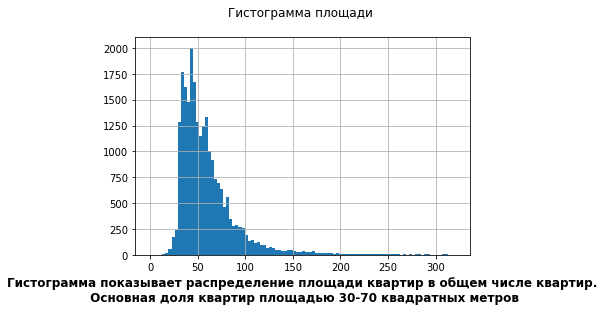

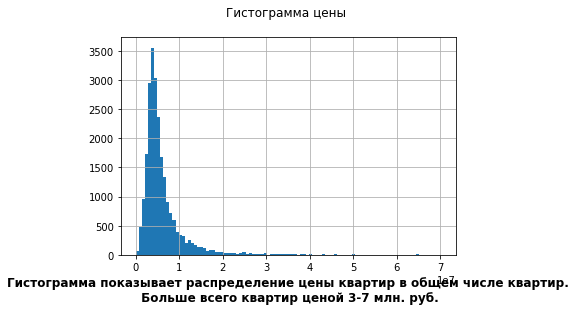

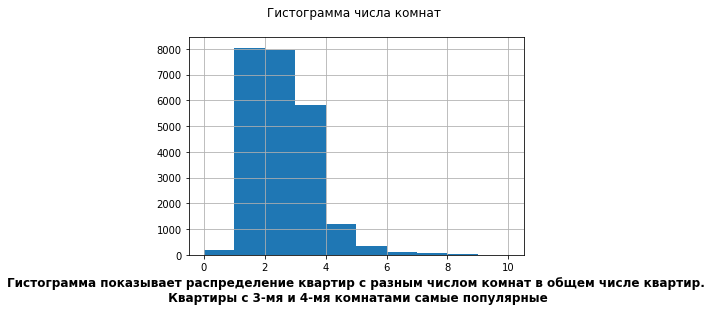

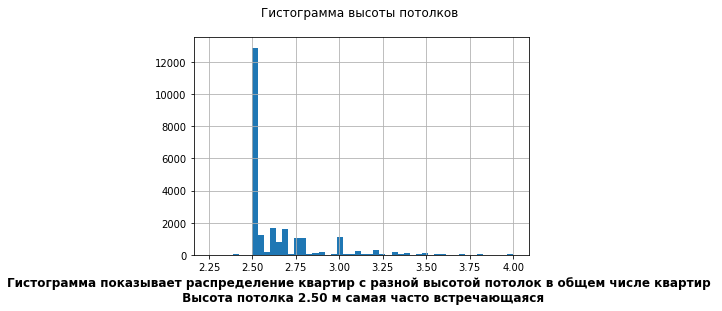

In [118]:
#Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим гистограммы для каждого параметра.
print('Гистоограммы для площади, цены, числа комнат и высоты потолков')

import matplotlib.pyplot as plt

#Гистограмма площади
real_estate_data.hist('total_area', bins=100, range=(0, 320))
plt.title('Гистограмма площади \n')
plt.xlabel("Гистограмма показывает распределение площади квартир в общем числе квартир.\n Основная доля квартир площадью 30-70 квадратных метров", fontsize=12, fontweight="bold")

#Гистограмма цены
real_estate_data.hist('last_price', bins=100, range=(0, 70000000))
plt.title('Гистограмма цены \n')
plt.xlabel("Гистограмма показывает распределение цены квартир в общем числе квартир.\n Больше всего квартир ценой 3-7 млн. руб.", fontsize=12, fontweight="bold")

#Гистограмма числа комнат
real_estate_data.hist('rooms', bins=10, range=(0, 10))
plt.title('Гистограмма числа комнат \n')
plt.xlabel("Гистограмма показывает распределение квартир с разным числом комнат в общем числе квартир.\n Квартиры с 3-мя и 4-мя комнатами самые популярные", fontsize=12, fontweight="bold")

#Гистограмма высоты потолков
real_estate_data.hist('ceiling_height', bins=50, range=(2.25, 4))
plt.title('Гистограмма высоты потолков \n')
plt.xlabel("Гистограмма показывает распределение квартир с разной высотой потолок в общем числе квартир \n Высота потолка 2.50 м самая часто встречающаяся", fontsize=12, fontweight="bold")

### Вывод

Согласно гистограмме площади видно, что большинство квартир имеют площадь от 30 до 75 квадратных метров. По гисторгармме цены  ожно сделать вывод, что большинство квартир в переделаз 3-7 млн. рублей. Гисторграмма по числу комнат сообщает нам, что самые популярные квартиры это 2-х и 3-х комнатные. И большинство квартир имеет потолки 2.50 м, с огромным отрывом от других значений. 

Посчитаем среднее и медиану времени продажи квартиры: 

Медиана времени продажи квартиры: 74.0 д.

Среднее время продажи квартиры: 156.60884425503187 д.

Данные по столбцу "Время продажи квартиры:"
count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


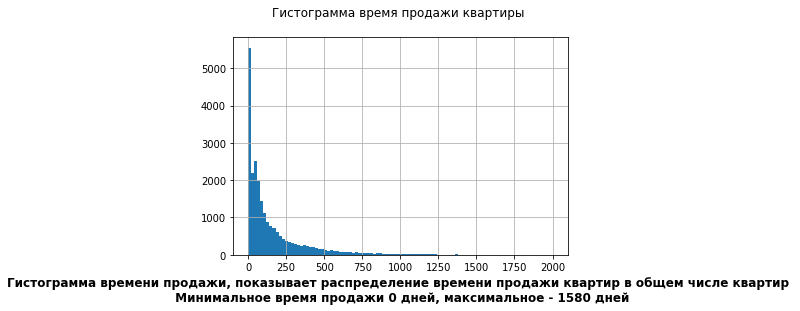

In [119]:
#Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 
#Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

#Изучим время продажи квартиры и построим гистограмму. 
real_estate_data.hist('days_exposition', bins=100, range=(0, 2000))
plt.title('Гистограмма время продажи квартиры \n')
plt.xlabel("Гистограмма времени продажи, показывает распределение времени продажи квартир в общем числе квартир \n Минимальное время продажи 0 дней, максимальное - 1580 дней", fontsize=12, fontweight="bold")

#Посчитаем среднее и медиану времени продажи квартиры.
print('Посчитаем среднее и медиану времени продажи квартиры: \n')
print('Медиана времени продажи квартиры:', real_estate_data['days_exposition'].median(),'д.\n')
print('Среднее время продажи квартиры:', real_estate_data['days_exposition'].mean(),'д.\n')

#Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
print('Данные по столбцу "Время продажи квартиры:"')
print(real_estate_data['days_exposition'].describe()) 
#Согласно полученным данным, меедиана продажи составляет - 74 дня. Минимальное время продажи - это 0 дней, что подозрительно,
# максимальное время продажи 1580 дней.

### Вывод

Согласно полученным данным, медиана продажи составляет - 74 дня. Минимальное время продажи - это 0 дней, что подозрительно, максимальное время продажи 1580 дней, что тоже очень долго.

Максимальное значение нормального распределения 464.5
Минимальное значение нормального распределения -243.5


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_living_area,date_time,floor_new,living_total_area,kitchen_total_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,1,482.0,2.0,755,0,120370.370370,2019-03-07,другой,47.222222,23.148148
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.50,11,18.60,1,False,...,0,0.0,0.0,0,81,82920.792079,2018-12-04,первый,46.039604,27.227723
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.50,5,34.30,4,False,...,1,90.0,2.0,574,558,92785.714286,2015-08-20,другой,61.250000,14.821429
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.50,14,159.00,9,False,...,2,84.0,3.0,234,424,408176.100629,2015-07-24,другой,100.000000,5.660377
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,2,112.0,1.0,48,121,100000.000000,2018-06-19,другой,32.000000,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,False,...,1,796.0,3.0,381,0,72490.845228,2017-03-21,другой,54.779164,10.335550
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5,38.00,4,False,...,0,0.0,0.0,0,45,52542.372881,2018-01-15,другой,64.406780,14.406780
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.50,3,29.70,1,False,...,0,0.0,0.0,0,0,44091.710758,2018-02-11,первый,52.380952,15.873016
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,76.75,12,False,...,2,173.0,3.0,196,602,149511.400651,2017-03-28,другой,100.000000,30.358306


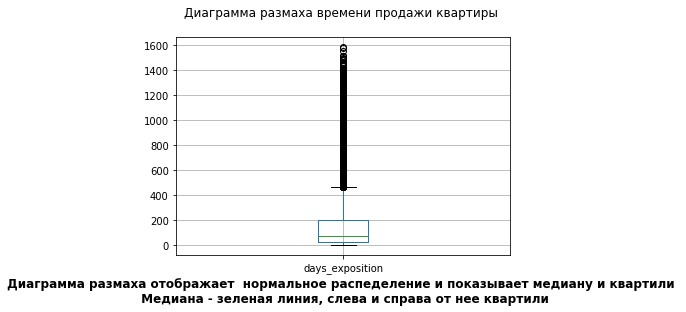

In [120]:
#Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
#построим диаграмму размаха
real_estate_data.boxplot('days_exposition') 
plt.title('Диаграмма размаха времени продажи квартиры \n')
plt.xlabel("Диаграмма размаха отображает  нормальное распеделение и показывает медиану и квартили \n Медиана - зеленая линия, слева и справа от нее квартили", fontsize=12, fontweight="bold")
Q1=22
Q3=199
norm_quartus = Q3-Q1
min_norm_quartus = Q1 - 1.5*norm_quartus
max_norm_quartus = Q3 + 1.5*norm_quartus
print('Максимальное значение нормального распределения',max_norm_quartus)
print('Минимальное значение нормального распределения',min_norm_quartus)
#Уберем редкие значения за 1000 дней
maximum_days = 1000
real_estate_data.query('days_exposition <= @maximum_days') 


### Вывод

Максимальное время продажи квартир - 1580 дней, что считаю это очень долгим и по гисторнамме времени продажи видно, что таких значений очень мало, поэтому убираем все значения что превышают 1000 дней.

Добавим в основную таблицу отдельно столбцы с днем, месяцем и годом 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7            16         51.0      8        False  ...   
1             2.5            11         18.6      1        False  ...   
2             2.5             5         34.3      4        False  ...   

   ponds_nearest  days_exposition  cost_living_area  date_time floor_new  \
0            755                0     120370.370370 2019-03-07    другой   
1              0               81      82920.792079 2018-12-04    первый   
2            574              558      92785.714286 2015-08-20    другой   

   living_total_area  kitchen_total_area  year 

Text(0.5, 0, 'График показывает  стоимость квартир в разные дни недели \n Понедельник, вторник и пятница - дни недели для более дорогих квартир, а среда для самых дешевых.')

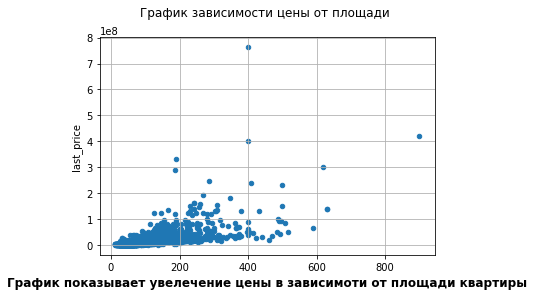

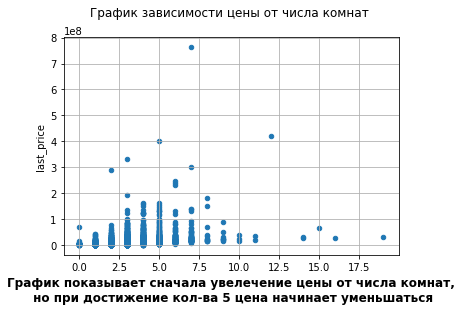

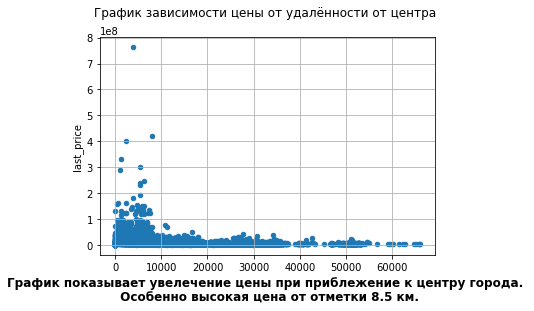

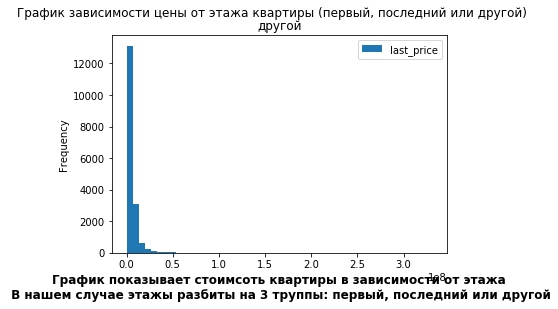

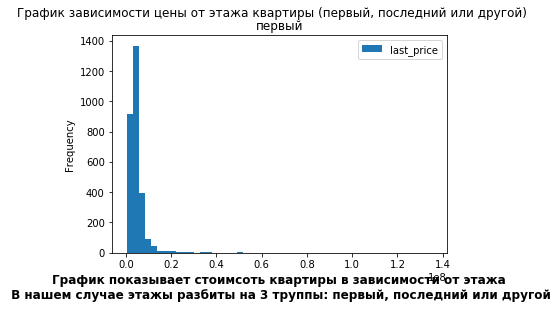

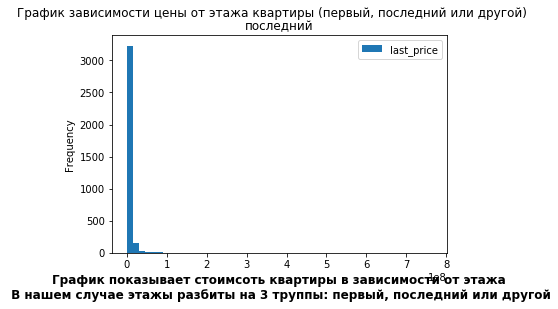

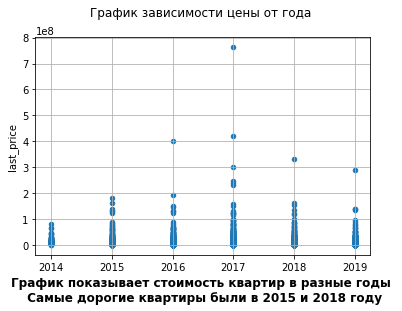

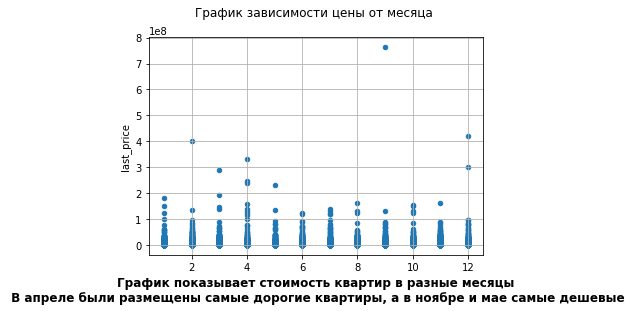

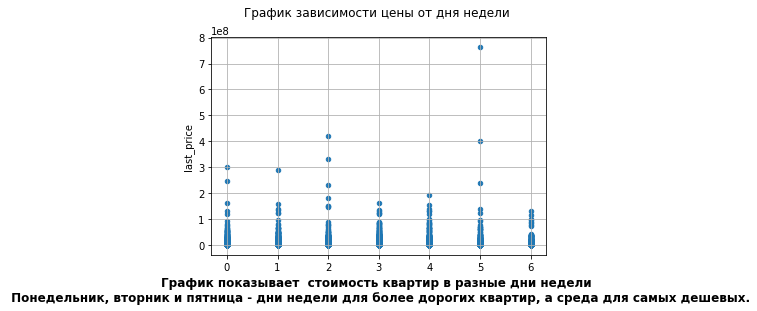

In [121]:
#Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, 
#числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена 
#квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#Построим график зависимости цены от площади
real_estate_data.plot(x='total_area', y='last_price', kind='scatter', grid=True, title='График зависимости цены от площади \n')
plt.xlabel("График показывает увелечение цены в зависимоти от площади квартиры", fontsize=12, fontweight="bold")
#Построим график зависимости цены от числа комнат
real_estate_data.plot(x='rooms', y='last_price', kind='scatter', grid=True, title='График зависимости цены от числа комнат \n')
plt.xlabel("График показывает сначала увелечение цены от числа комнат,\n но при достижение кол-ва 5 цена начинает уменьшаться", fontsize=12, fontweight="bold")
#Построим график зависимости цены от удалённости от центра
real_estate_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, title='График зависимости цены от удалённости от центра \n')
plt.xlabel("График показывает увелечение цены при приблежение к центру города. \n Особенно высокая цена от отметки 8.5 км.", fontsize=12, fontweight="bold")
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
#Напишем цикл, который выедет три отделных графика для каждой категории этажности
for name, group_data in real_estate_data.groupby('floor_new'):
    (group_data
    .plot(y='last_price', title=name, kind='hist', bins=50)
    )
    plt.suptitle("График зависимости цены от этажа квартиры (первый, последний или другой) \n")
    plt.xlabel("График показывает стоимсоть квартиры в зависимости от этажа\n В нашем случае этажы разбиты на 3 труппы: первый, последний или другой", fontsize=12, fontweight="bold")
    
# Также изучите зависимость от даты размещения: дня недели, месяца и года.
real_estate_data['year'] = real_estate_data['date_time'].dt.year
real_estate_data['month'] = real_estate_data['date_time'].dt.month
real_estate_data['weekday'] = real_estate_data['date_time'].dt.weekday
print('Добавим в основную таблицу отдельно столбцы с днем, месяцем и годом \n')
print(real_estate_data.head(3))
#Построим график зависимости цены от года

real_estate_data.plot(x='year', y='last_price', kind='scatter', grid=True,  title='График зависимости цены от года \n')
plt.xlabel("График показывает стоимость квартир в разные годы \n Самые дорогие квартиры были в 2015 и 2018 году" , fontsize=12, fontweight="bold")
#Построим график зависимости цены от месяца
real_estate_data.plot(x='month', y='last_price', kind='scatter', grid=True,  title='График зависимости цены от месяца \n')
plt.xlabel("График показывает стоимость квартир в разные месяцы\n В апреле были размещены самые дорогие квартиры, а в ноябре и мае самые дешевые" , fontsize=12, fontweight="bold")
#Построим график зависимости цены от дня недели
real_estate_data.plot(x='weekday', y='last_price', kind='scatter', grid=True,  title='График зависимости цены от дня недели \n')
plt.xlabel("График показывает  стоимость квартир в разные дни недели \n Понедельник, вторник и пятница - дни недели для более дорогих квартир, а среда для самых дешевых.", fontsize=12, fontweight="bold")

### Вывод

Цена сильно зависит от площади, колчества комнат и удаленности от центра города. Чем больше площадь, тем больше цена 
и эта зависимость линейная. В случае количества комнат, цена сначал расчет, но пр кол-ве комнат больше 5, цена начинает 
снижаться.Цена сильно увеличивается когда квартиры приближаются к центру от 10 км и ближе. Квартиры расположенные дальше 
10 км центра сильной зависимости по цене не имеют. Самые дешевые квартиры на последнем этаже, самые дорогие на первом этажа, 
а вот другие - находятся в среднем ценновом сегменте. Самые дорогие квартиры были в 2015 и 2018 году. В апреле были 
размещены самые дорогие квартиры, а в ноябре и мае самые дешевые.Понедельник, вторник и пятница - дни недели для более 
дорогих квартир, а среда для самых дешевых.

In [122]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
#Эти данные можно найти по имени в столбце 'locality_name'.
print('Список 10 населённых пунктов с наибольшим числом объявлений: \n')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('посёлок Мурино', 'Мурино')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('посёлок Шушары', 'Шушары')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('посёлок Парголово', 'Парголово')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('деревня Кудрово', 'Кудрово')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('деревня Новое Девяткино', 'Девяткино')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('посёлок Бугры', 'Бугры')
#Выбираем 10 населённых пунктов с наибольшим числом объявлений
top10 = real_estate_data['locality_name'].value_counts().head(10)
print(top10)
#Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
good_top10 = real_estate_data.query('locality_name in ("Санкт-Петербург","Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")')
good_top10_stat = good_top10.pivot_table(index='locality_name', values='cost_living_area', aggfunc='mean')
print('\n Средняя цена квадратного метра: \n')
print(good_top10_stat)
print('\n Максимальная цена квадратного метра: \n')
print(good_top10_stat[good_top10_stat.cost_living_area == good_top10_stat.cost_living_area.max()])
print('\n Минимальная цена квадратного метра: \n')
print(good_top10_stat[good_top10_stat.cost_living_area == good_top10_stat.cost_living_area.min()])



Список 10 населённых пунктов с наибольшим числом объявлений: 

Санкт-Петербург    15721
Мурино               556
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

 Средняя цена квадратного метра: 

                 cost_living_area
locality_name                    
Всеволожск           68654.473986
Выборг               58141.909153
Гатчина              68746.146763
Колпино              75424.579098
Кудрово              95324.930544
Мурино               86178.443998
Парголово            90175.913458
Пушкин              103125.819291
Санкт-Петербург     114849.008794
Шушары               78677.364217

 Максимальная цена квадратного метра: 

                 cost_living_area
locality_name                    
Санкт-Петербург     114849.008794

 Минимальная цена квадратного метра: 

               cost_living

### Вывод

Выбрали 10 населенных пунктов с наибольшим числом объявлений. Проанализировав данные получили, что максимальная стоимость квадратного метра в Санкт-Петербурге, а минимальная в Выборге. 

Таблица только с квартирами в Санкт-Петербурге и доп. столбцом с расстоянием до центра в километрах: 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7            16         51.0      8        False  ...   
2             2.5             5         34.3      4        False  ...   
3             2.5            14        159.0      9        False  ...   

   days_exposition  cost_living_area  date_time  floor_new living_total_area  \
0                0     120370.370370 2019-03-07     другой         47.222222   
2              558      92785.714286 2015-08-20     другой         61.250000   
3              424     408176.100629 2015-07-24     другой        100.000000   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'График показывает зависимость цены квартиры от расстояния до центра города. \n Чем ближе к центру, тем выше цена квартиры.')

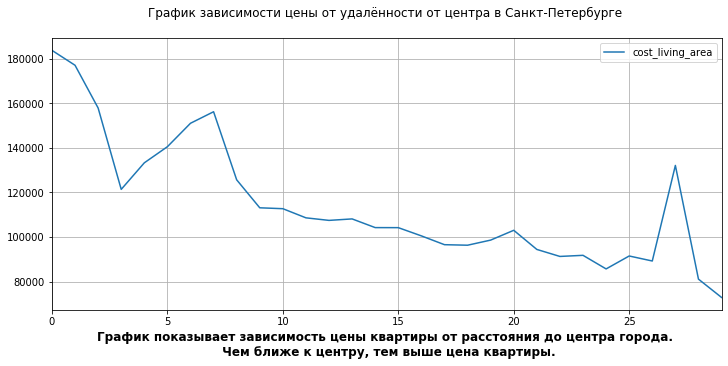

In [123]:
#Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
#Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. 
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
#После этого посчитайте среднюю цену для каждого километра. 
#Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
#Определите границу, где график сильно меняется — это и будет центральная зона.

#Выделяем квартиры в Санкт-Петербурге ('locality_name')
spb = real_estate_data.query('locality_name in ("Санкт-Петербург")')
#Создаем столбец с расстоянием до центра в километрах и округляем до целых значений
spb['cityCenters_petersburg'] = (spb['cityCenters_nearest'] / 1000).round()
print('Таблица только с квартирами в Санкт-Петербурге и доп. столбцом с расстоянием до центра в километрах: \n')
print(spb.head(3))
#Посчитаем среднюю цену для каждого километра и построим график зависимости цены от удалённости от центра
(spb
        .pivot_table(index='cityCenters_petersburg', values='cost_living_area', aggfunc='mean')
        .plot(grid=True, figsize=(12, 5), title='График зависимости цены от удалённости от центра в Санкт-Петербурге \n')
)
plt.xlabel("График показывает зависимость цены квартиры от расстояния до центра города. \n Чем ближе к центру, тем выше цена квартиры.", fontsize=12, fontweight="bold")

### Вывод

Согласно графикику стоимости квартир от удаленности от центра, видим, что график сильно меняется на 3 км., в связи с чем будем считать 3 км. до центра - это центральная зона.

Список квартир в центре Санкт-Петербурга: 

    total_images  last_price  total_area first_day_exposition  rooms  \
24             8   6500000.0        97.2  2015-10-31T00:00:00      2   
81             9  10949000.0        68.0  2018-12-27T00:00:00      1   
99            32   9600000.0        90.0  2017-09-26T00:00:00      4   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
24             2.5             3         46.5      1        False  ...   
81             2.5            10         68.0      6        False  ...   
99             2.5             5         67.0      2        False  ...   

    days_exposition  cost_living_area  date_time  floor_new living_total_area  \
24              265      66872.427984 2015-10-31     первый         47.839506   
81                0     161014.705882 2018-12-27     другой        100.000000   
99              104     106666.666667 2017-09-26     другой         74.444444   

    kitchen_total_area  year  month  weekday 

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/py

Text(0.5, 0, '\nГрафик показывает зависимости цены от дня недели в центре СПб\n  воскресенье - самые дешевые квартиры \n понедельник, вторник и четверг - самые дорогие')

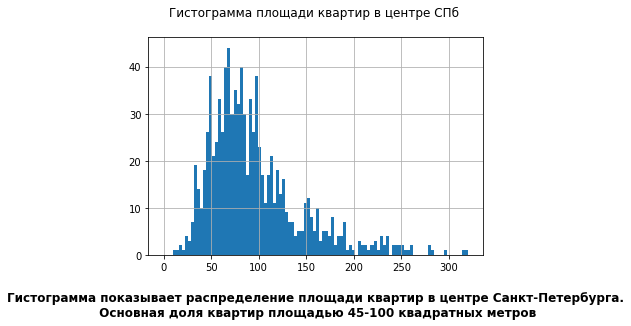

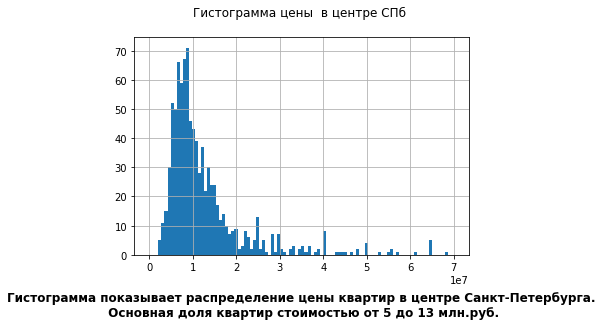

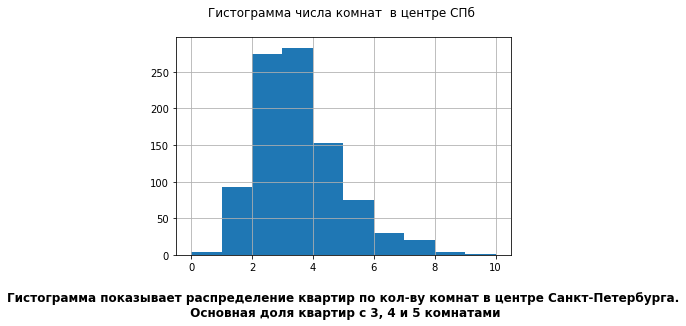

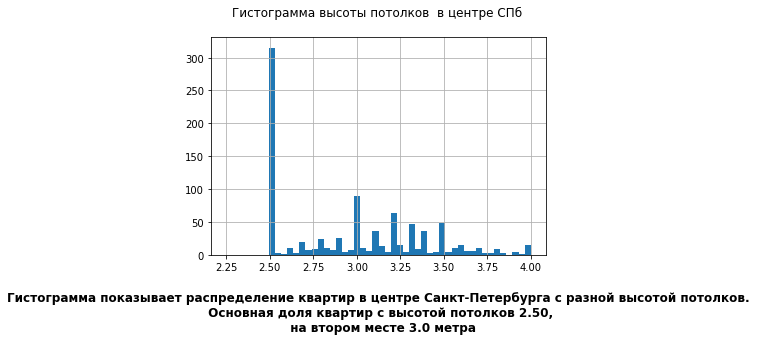

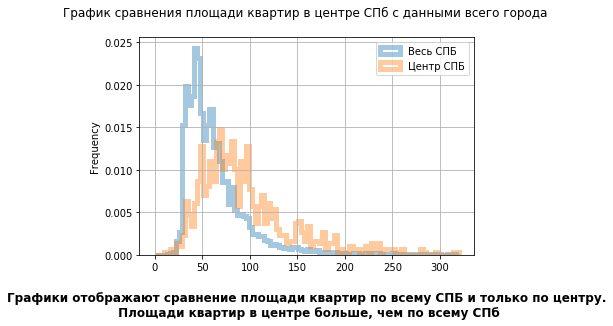

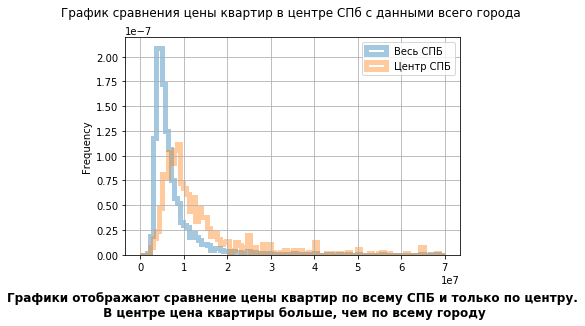

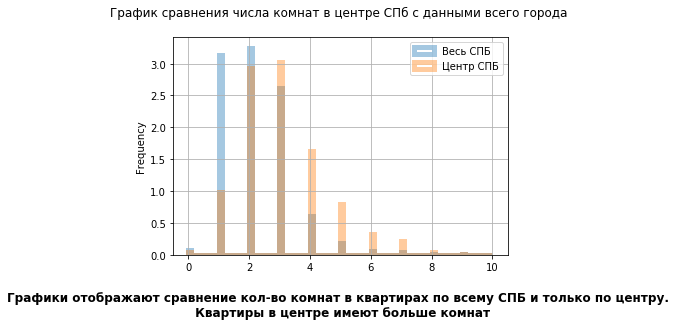

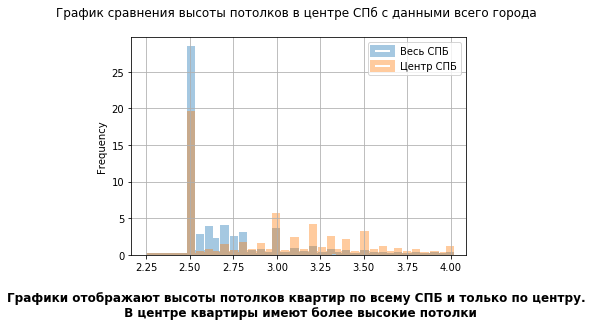

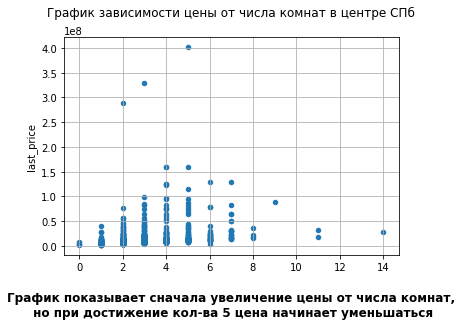

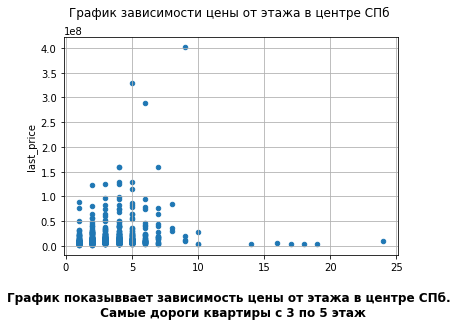

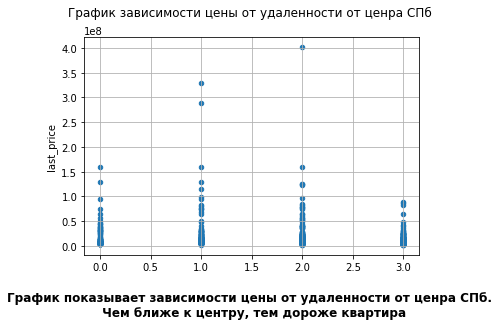

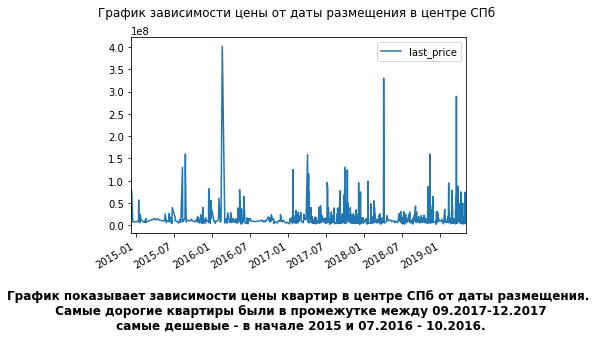

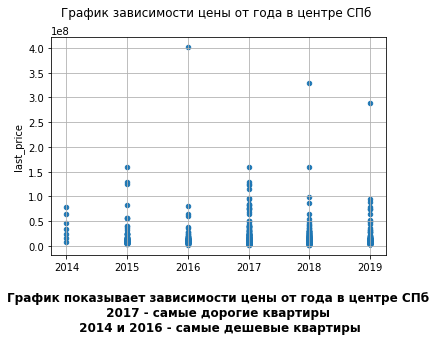

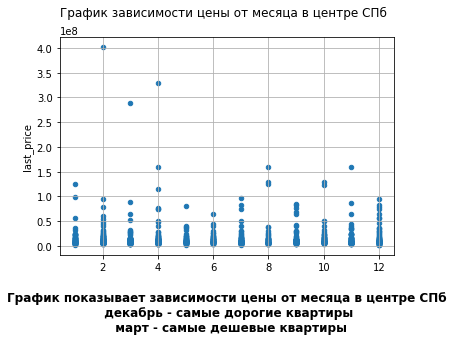

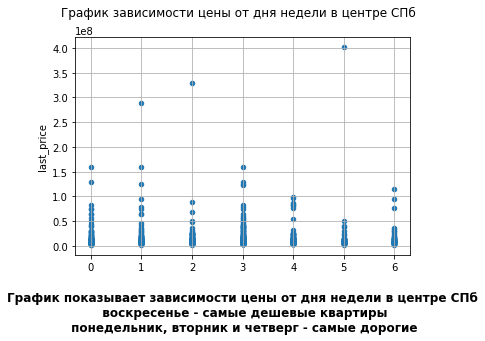

In [124]:
#Выделите сегмент квартир в центре. 
#Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, 
#дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
spb_center = spb.query('cityCenters_petersburg <= 3')
print('Список квартир в центре Санкт-Петербурга: \n')
print(spb_center.head(3))
#Гистограмма площади квартир в центре СПб
spb_center.hist('total_area', bins=100, range=(0, 320))
plt.title('Гистограмма площади квартир в центре СПб \n')
plt.xlabel("\nГистограмма показывает распределение площади квартир в центре Санкт-Петербурга.\n Основная доля квартир площадью 45-100 квадратных метров", fontsize=12, fontweight="bold")

#Гистограмма цены  в центре СПб
spb_center.hist('last_price', bins=100, range=(0, 70000000))
plt.title('Гистограмма цены  в центре СПб \n')
plt.xlabel("\nГистограмма показывает распределение цены квартир в центре Санкт-Петербурга.\n Основная доля квартир стоимостью от 5 до 13 млн.руб.", fontsize=12, fontweight="bold")

#Гистограмма числа комнат  в центре СПб
spb_center.hist('rooms', bins=10, range=(0, 10))
plt.title('Гистограмма числа комнат  в центре СПб \n')
plt.xlabel("\nГистограмма показывает распределение квартир по кол-ву комнат в центре Санкт-Петербурга.\n Основная доля квартир с 3, 4 и 5 комнатами", fontsize=12, fontweight="bold")

#Гистограмма высоты потолков  в центре СПб
spb_center.hist('ceiling_height', bins=50, range=(2.25, 4))
plt.title('Гистограмма высоты потолков  в центре СПб \n')
plt.xlabel("\nГистограмма показывает распределение квартир в центре Санкт-Петербурга с разной высотой потолков.\n Основная доля квартир с высотой потолков 2.50,\n  на втором месте 3.0 метра", fontsize=12, fontweight="bold")

#График сравнения площади квартир в центре СПб с данными всего города
ax = spb.plot(kind='hist', y='total_area', histtype='step', range=(0, 320), bins=100,normed=True, linewidth=5, alpha=0.4, label='Весь СПБ')
spb_center.plot(kind='hist', y='total_area', histtype='step', range=(0, 320), bins=100,normed=True, linewidth=5, alpha=0.4, label='Центр СПБ', ax=ax, grid=True, legend=True) 
plt.title('График сравнения площади квартир в центре СПб с данными всего города \n')
plt.xlabel("\nГрафики отображают сравнение площади квартир по всему СПБ и только по центру.\n Площади квартир в центре больше, чем по всему СПб", fontsize=12, fontweight="bold")

#График сравнения цены квартир в центре СПб с данными всего города
ax = spb.plot(kind='hist', y='last_price', histtype='step', range=(0, 70000000), bins=100, normed=True, linewidth=5, alpha=0.4, label='Весь СПБ')
spb_center.plot(kind='hist', y='last_price', histtype='step', range=(0, 70000000), bins=100, normed=True, linewidth=5, alpha=0.4, label='Центр СПБ', ax=ax, grid=True, legend=True) 
plt.title('График сравнения цены квартир в центре СПб с данными всего города \n')
plt.xlabel("\nГрафики отображают сравнение цены квартир по всему СПБ и только по центру.\n В центре цена квартиры больше, чем по всему городу", fontsize=12, fontweight="bold")

#График сравнения числа комнат в центре СПб с данными всего города
ax = spb.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=100, normed=True, linewidth=5, alpha=0.4, label='Весь СПБ')
spb_center.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=100, normed=True, linewidth=5, alpha=0.4, label='Центр СПБ', ax=ax, grid=True, legend=True) 
plt.title('График сравнения числа комнат в центре СПб с данными всего города \n')
plt.xlabel("\nГрафики отображают сравнение кол-во комнат в квартирах по всему СПБ и только по центру. \n Квартиры в центре имеют больше комнат", fontsize=12, fontweight="bold")

#График сравнения высоты потолков в центре СПб с данными всего города
ax = spb.plot(kind='hist', y='ceiling_height', histtype='step', range=(2.25, 4), bins=100, normed=True, linewidth=5, alpha=0.4, label='Весь СПБ')
spb_center.plot(kind='hist', y='ceiling_height', histtype='step', range=(2.25, 4), bins=100, normed=True, linewidth=5, alpha=0.4, label='Центр СПБ', ax=ax, grid=True, legend=True) 
plt.title('График сравнения высоты потолков в центре СПб с данными всего города \n')
plt.xlabel("\nГрафики отображают высоты потолков квартир по всему СПБ и только по центру. \n В центре квартиры имеют более высокие потолки", fontsize=12, fontweight="bold")

#Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

#Построим график зависимости цены от числа комнат в центре СПб
spb_center.plot(x='rooms', y='last_price', kind='scatter', grid=True, title='График зависимости цены от числа комнат в центре СПб\n')
plt.xlabel("\nГрафик показывает сначала увеличение цены от числа комнат,\n но при достижение кол-ва 5 цена начинает уменьшаться", fontsize=12, fontweight="bold")

#Построим график зависимости цены от этажа в центре СПб
spb_center.plot(x='floor', y='last_price', kind='scatter', grid=True, title='График зависимости цены от этажа в центре СПб \n')
plt.xlabel("\nГрафик показыввает зависимость цены от этажа в центре СПб. \n Самые дороги квартиры с 3 по 5 этаж", fontsize=12, fontweight="bold")

#Построим график зависимости цены от удаленности от ценра СПб
spb_center.plot(x='cityCenters_petersburg', y='last_price', kind='scatter', grid=True, title='График зависимости цены от удаленности от ценра СПб \n')
plt.xlabel("\nГрафик показывает зависимости цены от удаленности от ценра СПб. \n Чем ближе к центру, тем дороже квартира", fontsize=12, fontweight="bold")

#Построим график зависимости цены от даты размещения в центре СПб
spb_center.plot(x='date_time', y='last_price', title='График зависимости цены от даты размещения в центре СПб \n')
plt.xlabel("\nГрафик показывает зависимости цены квартир в центре СПб от даты размещения.\n Самые дорогие квартиры были в промежутке между 09.2017-12.2017\n самые дешевые - в начале 2015 и 07.2016 - 10.2016.", fontsize=12, fontweight="bold")

#Построим график зависимости цены от года, месяца и дня в центре СПб
spb_center['year'] = spb_center['date_time'].dt.year
spb_center['month'] = spb_center['date_time'].dt.month
spb_center['weekday'] = spb_center['date_time'].dt.weekday
#Построим график зависимости цены от года
spb_center.plot(x='year', y='last_price', kind='scatter', grid=True, title='График зависимости цены от года в центре СПб \n')
plt.xlabel("\nГрафик показывает зависимости цены от года в центре СПб\n 2017 - самые дорогие квартиры \n 2014 и 2016 - самые дешевые квартиры", fontsize=12, fontweight="bold")
#Построим график зависимости цены от месяца
spb_center.plot(x='month', y='last_price', kind='scatter', grid=True, title='График зависимости цены от месяца в центре СПб  \n')
plt.xlabel("\nГрафик показывает зависимости цены от месяца в центре СПб\n  декабрь - самые дорогие квартиры \n  март - самые дешевые квартиры", fontsize=12, fontweight="bold")
#Построим график зависимости цены от дня недели
spb_center.plot(x='weekday', y='last_price', kind='scatter', grid=True, title='График зависимости цены от дня недели в центре СПб  \n')
plt.xlabel("\nГрафик показывает зависимости цены от дня недели в центре СПб\n  воскресенье - самые дешевые квартиры \n понедельник, вторник и четверг - самые дорогие", fontsize=12, fontweight="bold")

### Вывод

При изучении центральной зоны и сравнение этих данных видим следующее, что квартиры в центре имеют больщую площадь, стоят дороже, имеют больше комнат (очень мало однокомнатных), имеют более высокие потолки, такие которые в остальных квартирах не встретишь. Чем больше количество комнат, тем больше цена, но при количестве комнат больше 5, цена начинает снижаться. В случае этажности, то цена растет до 4 этажа, а потом начинает снижаться. Цена пропрционально зависит по приближению к центру центральной зоны.
Самые дорогие квартиры были промежутке между 09.2017-12.2017, самые дешевые - в начале 2015 и 07.2016 - 10.2016.

### Вывод

Изучили следующие параметры: площадь, цена, число комнат, высота потолков и построили гистограммы для каждого параметра.

Нормальное время продажи квартиры лежит в рамках от 22 до 199 дней, что лежит в пределах между первым (Q1) и третим (Q3) квартусом. Все квартиры которые продаются меньше чем 22 дня, считаю быстрой продажой, а все что за пределами 199 дней, долгими. Если продажа занимает больше 1000 дней, является выбросом, поэтому эти данные требуется убрать.

Цена сильно зависит от площади, колчества комнат и удаленности от центра города. Чем больше площадь, тем больше цена и эта зависимость линейная. В случае количества комнат, цена сначал расчет, но пр кол-ве комнат больше 5, цена начинает снижаться.Цена сильно увеличивается когда квартиры приближаются к центру от 10 км и ближе. Квартиры расположенные дальше 10 км центра сильной зависимости по цене не имеют.

Самые дешевые квартиры на последнем этаже, самые дорогие на первом этажа, а вот другие - находятся в среднем ценновом сегменте.
Самые дорогие квартиры были в 2015 и 2018 году. В апреле были размещены самые дорогие квартиры, а в ноябре и мае самые дешевые.

Понедельник, вторник и пятница - дни недели для более дорогих квартир, а среда для самых дешевых.

Самые дорогие квартиры в Санкт-Петербурге, а самые дешевые в Выборге.

Согласно полученным данным график стоимости квартир от удаленности от центра сильно меняется на 3 км. до центра, в связи с чем будем считать 3 км. до центра - это центральная зона. 

При изучении центральной зоны и сравнени этих данныз видим следующее, что квартиры в центре имеют больщую площадь, стоят дороже,  имеют больше комнат (очень мало однокомнатных), имеют более высокие потолки, такие которые в остальных квартирах не встретишь.
Чем больше количество комнат, тем больше цена, но при кол-ве комнат больше 5, цена начинает снижаться. В случае этажности, то цена растет до 4 этажа, а потом начинает снижаться. Цена пропрционально зависит по приближению к центру центральной зоны.

Самые дорогие квартиры были промежутке между 09.2017-12.2017, самые дешевые - в начале 2015 и 07.2016 - 10.2016.  



### Шаг 5. Общий вывод

Самые дорогие квартиры в Санкт-Петербурге и особенно в центре города, а именно в центральной зоне до 3-х км. до центра. Самые дешевые в ленинградской области в г. Выборг. Больше всего на стоимость квартир влияет площадь, здесь практически линейная зависимость, количество комнат и этаж влияет на стоимость, но здесь зависимость не линейная. Также выяснилось, что квартиры в центре города больше по количеству комнат и имеют более высокие потолки. Цена квартир увеличивалась постепенно начиная с 2015 года и достигла максимума в конце 2017 года, потом было произошло уменьшение стоимости и уже начиная с 2019 года цены начали рости.



### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод